<a href="https://colab.research.google.com/github/IdaSharonJ/Python-exercises/blob/main/26AUG-Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 3: Visualization

In [ ]:
import pandas as pd
ti = pd.read_csv('titanic.csv')
ti.head(3)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


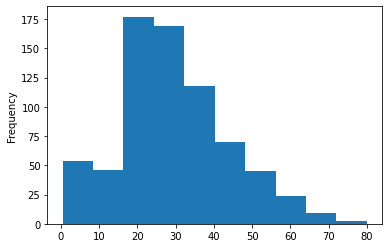

In [3]:
ti['age'].plot(kind='hist');


**SEABORN TO VISUALIZE DATA**

In [4]:
import seaborn as sns

In [5]:
ti.isna().sum() #check for emptiness

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#replace NaNs in numerical fields with the mean values
ti=ti.fillna(ti.mean()) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [7]:
# fill every column with its own most frequent value 
ti = ti.apply(lambda x:x.fillna(x.value_counts().index[0])) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


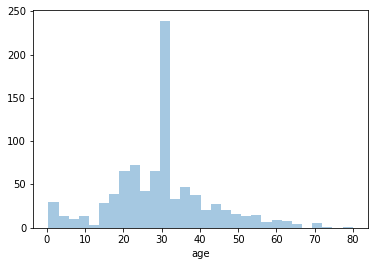

In [8]:
sns.distplot(ti['age'], kde=False);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


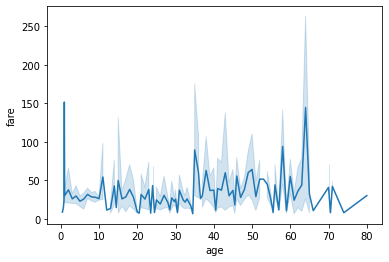

In [9]:
sns.lineplot(ti['age'], ti['fare'])


**USE DATA FRAME WITH SEABORN**

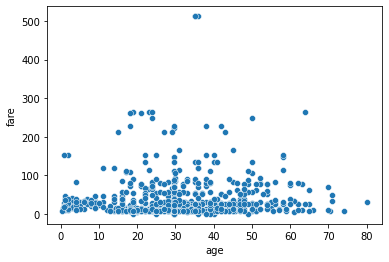

In [10]:
sns.scatterplot(data=ti, x='age', y='fare')


**DISTRIBUTION PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


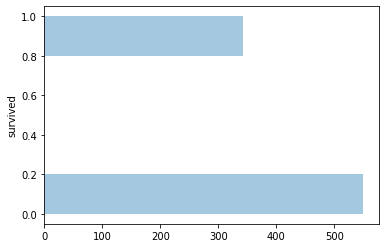

In [11]:
sns.distplot(ti['survived'], vertical=True, kde=False)


**VIOLIN PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


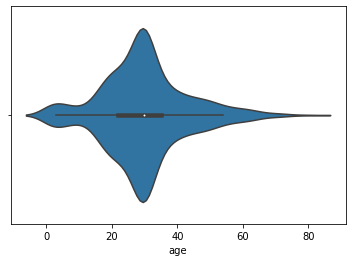

In [12]:
sns.violinplot(ti['age'])


VIOLIN PLOT FOR MULTIPLE COLUMNS

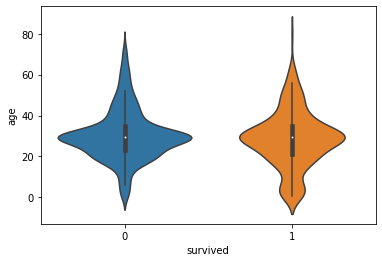

In [13]:
sns.violinplot(data=ti, x='survived', y='age')


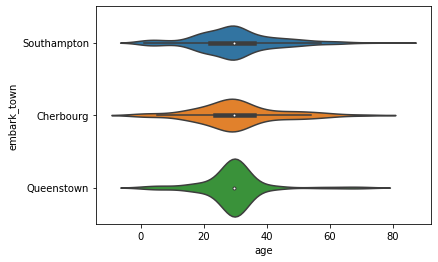

In [15]:
sns.violinplot(data=ti, x="age", y='embark_town')

**BOX PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


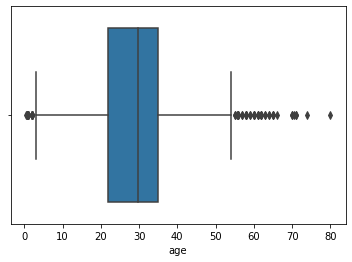

In [14]:
sns.boxplot(ti['age'])


**BAR PLOT FOR MULTIPLE COLUMNS**

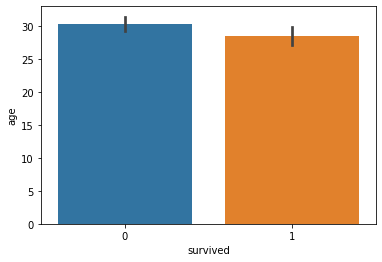

In [16]:
sns.barplot(data=ti, x='survived', y='age');

**LINE PLOT**

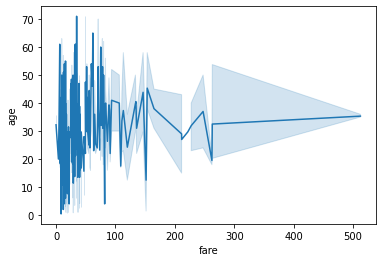

In [17]:
sns.lineplot(data=ti, x='fare', y='age');

**SCATTER PLOT**

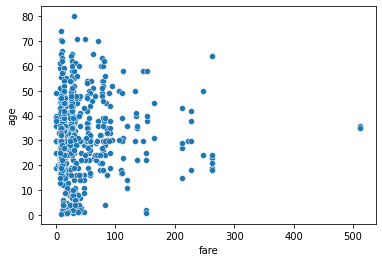

In [18]:
sns.scatterplot(data=ti, x='fare', y='age');

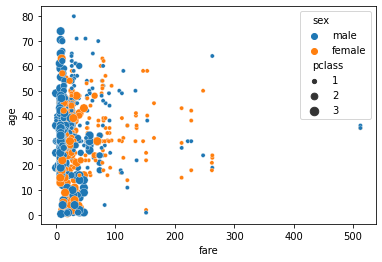

In [19]:
sns.scatterplot(data=ti, x='fare', y='age', 
                hue = 'sex', 
                size = 'pclass');

# **EXERCISES**

STEP 1

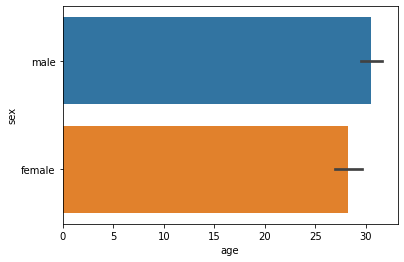

In [20]:
sns.barplot(x='age',y='sex',data=ti)

In [21]:
ti.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


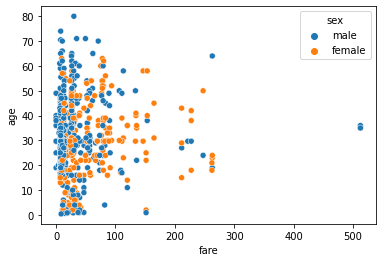

In [22]:
sns.scatterplot(x='fare',y='age',hue='sex',data=ti)

STEP 2

In [23]:
sur=ti.groupby('survived').count()

In [24]:
sur_gen=sur['sex']
sur_gen

survived
0    549
1    342
Name: sex, dtype: int64

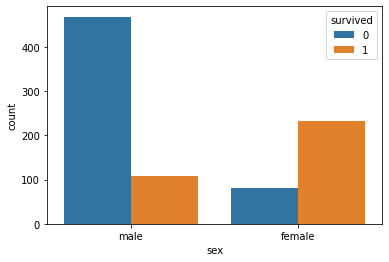

In [25]:
sns.countplot(x ="sex", hue ="survived", data = ti)

COMPARISON ON SURVIVAL RATE BASED ON GENDER

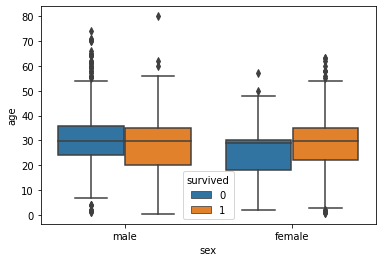

In [26]:
sns.boxplot(x ="sex",y='age', hue ="survived", data = ti)

MALE AND FEMALE WHO HAVE SURVIVED FROM AGE 20 TO 35

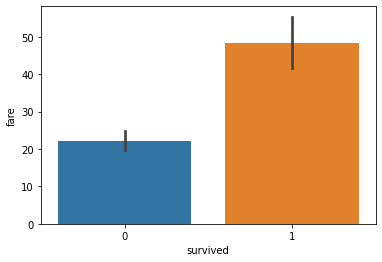

In [27]:
sns.barplot(y='fare',x='survived',data=ti)

PEOPLE WITH EXPENSIVE TICKETS SURVVED MORE THAN THOSE WITH NON-EXPENSIVE TICKETS 

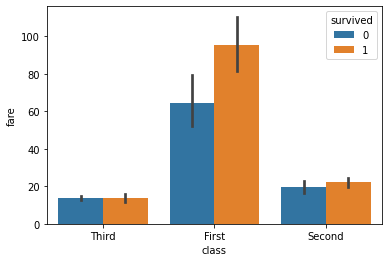

In [28]:
sns.barplot(x='class',y='fare',hue='survived',data=ti)

PEOPLE IN FIRST CLASS SURVIVED MORE THAN PEOPLE IN OTHER CLASSES

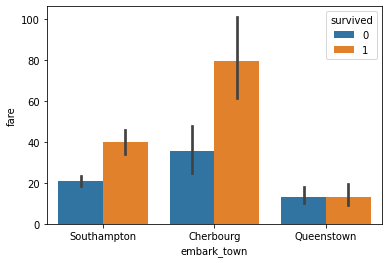

In [29]:
sns.barplot(y='fare',x='embark_town',hue='survived',data=ti)

THOSE WHO BOARDED SHIP FROM CHERBOURG SURVIVED MORE COMPARED TO THOSE FROM SOUTHAMPTON AND QUEENSTOWN.

### Consider:
* Univariate (single-col) plots
    * sns.distplot 
        * of survived
    * sns.violinplot 
        * of fare
    * sns.boxplot
        * of age

In [30]:
s=ti['survived'].value_counts()
s

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


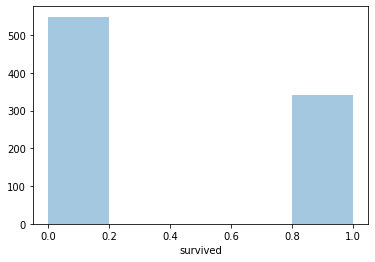

In [31]:
sns.distplot(ti['survived'], kde=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


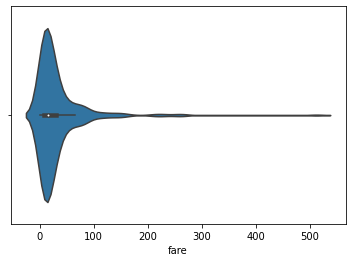

In [32]:
sns.violinplot(ti['fare'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


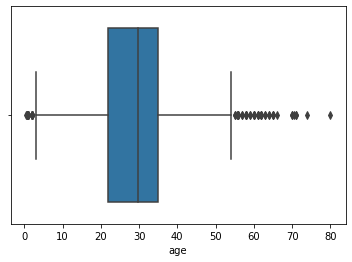

In [33]:
sns.boxplot(ti['age'])

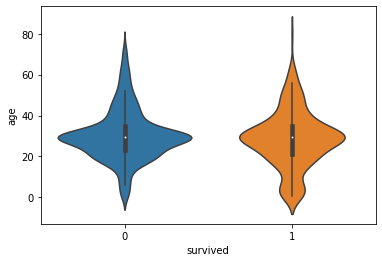

In [34]:
sns.violinplot(data=ti, x='survived', y='age') #MULTIVARIATE PLOTS

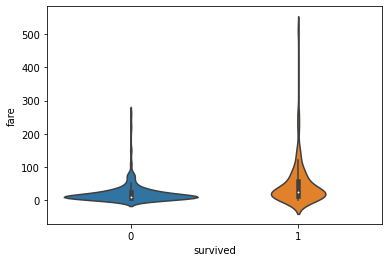

In [35]:
sns.violinplot(data=ti, x='survived', y='fare')

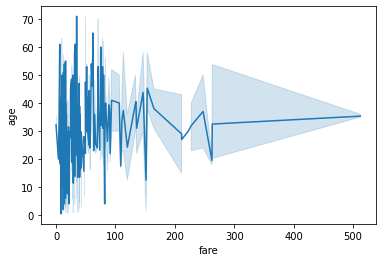

In [36]:
sns.lineplot(x='fare',y='age',data=ti)

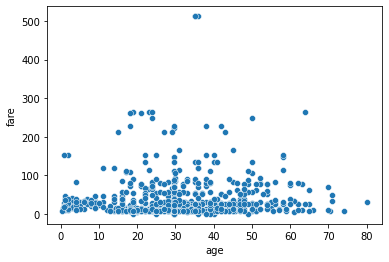

In [37]:
sns.scatterplot(x='age',y='fare',data=ti,palette='coolwarm')

In [38]:
ti[["age","sex"]].groupby(ti.age>18).sum()

,age
age,
False,1489.670000
True,24972.243824
